# Transit Time Sensitivity Assessment with Linear Regression

## Import the required libraries


In [ ]:
# All Libraries required for this lab are listed below.

# %pip install pandas==2.2.2 numpy==2.1.0 seaborn==0.13.0 matplotlib==3.9.2 scikit-learn==1.5.1

In [574]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [575]:
#Supress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Importing the Dataset


This is a private dataset. For Reference and showcase only.  

In [576]:
data = pd.read_csv("C:/Users/willl/OneDrive/Desktop/My_Documents/Wills_Py_Folder/ml_training/Project_Trans_Data.csv")
data.head()

,vrid,tp_id,report_day,vr_create_date,report_week,rpt_wk,report_year,rpt_yr,report_month,rpt_mon,...,total_pkg_unit_count_b,global_dea_pkgs_b,xirgo_transit_hours_actual_b,vls_transit_hours_actual_b,b_transit_hours_actual,pc_miler_zip_to_zip_transit_hours_b,pc_miler_node_to_node_transit_hours_b,scheduled_transit_hours_b,common_lane,is_toured
0,114DFRN1M,Tp-226833249,2/1/2024 0:00,1/31/2024 12:08,W5,5,R2024,2024,M02,2,...,3199,NaN,NaN,0.500,0.5000,1.05,1.05,1.13,Common,0
1,1132JVRG4,Tp-225904057,2/1/2024 0:00,1/24/2024 22:32,W5,5,R2024,2024,M02,2,...,2963,NaN,0.523,0.383,0.5230,1.82,1.05,1.11,Common,1
2,112VLW3BB,Tp-226058917,2/1/2024 0:00,1/25/2024 6:54,W5,5,R2024,2024,M02,2,...,5221,NaN,1.066,1.000,1.0660,1.12,1.15,1.41,Common,1
3,113CQ18WZ,Tp-226055772,2/1/2024 0:00,1/25/2024 6:52,W5,5,R2024,2024,M02,2,...,558,NaN,NaN,60.033,60.0333,77.08,58.40,82.00,Common,0
4,11578XDMH,Tp-225831886,2/1/2024 0:00,1/24/2024 16:58,W5,5,R2024,2024,M02,2,...,376,3.0,1.167,1.183,1.1670,2.03,NaN,2.00,Common,1


In [577]:
# This has 186 columns which is to many! Explore the data and remove columns, this can be done in Excel or SQL
# This took a few iterations to get the right columns to remove, models need full data that is able to be numerically encoded
# Note the space after the commas are required.
data.drop(['vrid', 'tp_id', 'vr_create_date', 'report_week', 'report_year', 'report_month', 'report_month_text', 'report_month_mmmyy', 'relative_report_day', 'relative_report_week', 'relative_report_month', 'relative_report_year', 'relative_report_quarter', 'dist_all_transit_hours', 'dist_bin_transit_hours', 'pc_miler_zip_to_zip_transit_hours', 'pc_miler_node_to_node_transit_hours', 'prod_singular_tp92_transit_hours', 'prod_singular_yard_time', 'prod_singular_break_time', 'origin_scheduled_depart_utc', 'origin_calc_depart_utc', 'dest_scheduled_arrival_utc', 'dest_calc_arrival_utc', 'xirgo_elapsed_in_transit', 'xirgo_elapsed_stationary', 'xirgo_distance_in_transit', 'xirgo_pickup_start_time_utc', 'xirgo_pickup_end_time_utc', 'xirgo_traffic_calc_departure_utc', 'xirgo_traffic_calc_arrival_utc', 'xirgo_yard_time_origin', 'origin_region', 'origin_zip', 'origin_state', 'dest_region', 'dest_state', 'dest_zip', 'account_id', 'program_code', 'planned_loaded_drive_time', 'prod_scallop_refresh_timestamp', 'is_using_scallop_time', 'is_using_bin_time', 'is_using_pc_miler_time', 'override_reason', 'shipment_mode', 'subcarrier', 'resource_block_id', 'trailer_id', 'origin_begin_loading_time_local', 'origin_begin_loading_time_utc', 'origin_finish_loading_time_utc', 'is_planned', 'prod_dynamic_break_time', 'prod_dynamic_tp92_transit_hours', 'prod_dynamic_yard_time', 'relay_yard_time_origin', 'scallop_dynamic_tp92_transit_hours', 'scallop_singular_tp92_transit_hours', 'is_executed', 'is_using_scallop_dynamic', 'is_using_scallop_singular', 'tta_time_available', 'dest_address_id', 'dest_market_id_address_id', 'last_updated_by', 'network_planning_team', 'origin_address_id', 'origin_market_id_address_id', 'override_created_by', 'prod_dynamic_transit_hours_source', 'prod_singular_transit_hours_source', 'scallop_dynamic_transit_hours_source', 'scallop_singular_transit_hours_source', 'dist_all_updated_timestamp', 'pc_miler_node_to_node_last_refresh', 'pc_miler_override_start', 'pc_miler_zip_to_zip_last_refresh', 'prod_mcm_refresh_timestamp', 'relay_pickup_end_time_utc', 'relay_pickup_start_time_utc', 'relay_traffic_calc_arrival_utc', 'relay_traffic_calc_departure_utc', 'is_wbr_customer_facing', 'is_using_dist_all_time', 'scallop_singular_break_time', 'scallop_dynamic_break_time', 'vr_update_date', 'stop_count', 'pc_miler_zip_to_zip_miles', 'run_structure_id', 'pc_miler_zip_to_zip_raw_time', 'pc_miler_zip_to_zip_break_time', 'pc_miler_node_to_node_raw_time', 'pc_miler_node_to_node_break_time', 'pc_miler_override_break_time', 'scallop_singular_tp50_transit_hours', 'scallop_dynamic_tp50_transit_hours', 'prod_singular_tp80_transit_hours', 'prod_dynamic_tp80_transit_hours', 'dist_bin_miles', 'a2a_singular_tp92_transit_hours', 'a2a_singular_tp92_drive_time', 'a2a_singular_tp80_transit_hours', 'a2a_singular_tp80_drive_time', 'a2a_singular_break_time', 'a2a_dynamic_tp92_transit_hours', 'a2a_dynamic_tp92_drive_time', 'a2a_dynamic_tp80_transit_hours', 'a2a_dynamic_tp80_drive_time', 'a2a_dynamic_break_time', 'a2a_location_type_used', 'is_using_a2a_time', 'a2a_refresh_timestamp', 'total_pkg_unit_count_b', 'global_dea_pkgs_b', 'xirgo_transit_hours_actual_b', 'vls_transit_hours_actual_b', 'pc_miler_zip_to_zip_transit_hours_b', 'pc_miler_node_to_node_transit_hours_b', 'scheduled_transit_hours_b','rpt_yr', 'equipment_type', 'tour_id', 'is_vls_customer_facing', 'enrichment_flag', 'pc_miler_override_transit_hours', 'relay_distance_in_transit', 'is_using_1p_override', 'facility_sequence', 'pc_miler_node_to_node_miles', 'pc_miler_override_miles', 'tp_level_used',
           'b_transit_hours_actual', 'origin', 'final_destination', 'origin_scheduled_depart_local', 'dest_scheduled_arrival_local', 'report_day', 'origin_calc_depart_local', 'dest_calc_arrival_local', 'origin_finish_loading_time_local', 'cpt', 'created_by', 'xirgo_transit_hours_actual', 'tour_day_rate'
           ], axis=1, inplace=True)

In [578]:
# Down to 40 columns, now lets do some more advanced data evaluation to better clean the data.
data.head()

,rpt_wk,rpt_mon,lane,scheduled_transit_hours,vls_transit_hours_actual,transit_hours_actual,depart_hour_local,arrived_early_minutes,xirgo_suspicious_data,miles,...,relay_transit_hours_actual,relay_suspicious_data,vls_suspicious_data,tta_miles,is_cpt_load,origin_coordinates,dest_coordinates,mi_band_max,common_lane,is_toured
0,5,2,CYVR->DVV5,1.13,0.5000,0.5000,2,-72,NaN,8,...,0.428,1.0,0,8,0,NaN,"[49.1970159000,-122.9991476000]",15.0,Common,0
1,5,2,YVR4->YVR2,1.11,0.3833,0.3833,10,-93,0.0,16,...,0.384,0.0,0,17,1,"[49.0549232200,-123.1077608000]","[49.1608781000,-122.9489380000]",30.0,Common,1
2,5,2,YUL2->YUL5,1.41,1.0000,1.0000,14,-15,0.0,23,...,0.986,0.0,0,23,1,"[45.4645888900,-73.7051281100]","[45.5127573300,-73.4068659500]",30.0,Common,1
3,5,2,YHM6->YVR7,82.00,60.0333,60.0333,23,-1339,NaN,2676,...,60.015,0.0,0,2683,0,"[43.9450240300,-78.9243592900]","[49.1736068900,-122.6700368000]",3200.0,Common,0
4,5,2,YHM5->INBT,2.00,1.1833,1.1670,0,-72,0.0,54,...,1.306,0.0,0,53,1,"[43.6122669900,-79.7844532500]",NaN,60.0,Common,1


In [579]:
# Count the nulls
data.isnull().sum()[data.isnull().sum() != 0]

# For columns that only have a few nulls, we can drop those rows. Ex. lane, cost_accrual..
# We have a lot of nulls for global_dea_pkgs, Xirgo actual hours etc. but that's okay we will handle those later
# We'll also want to convert origin/dest coordinates to a binary of has_coordinates 0 or 1
# We'll want to convert some to categorical like: origin_type, dest_type, arc_type, transit_operator_type common_lane,
# Finally we'll want to create a reference mapping for lane and scac


lane                              13
xirgo_suspicious_data          96489
is_tot_min                       342
is_tot_30_min                    342
under_bias_hours                 342
over_bias_hours                  342
global_dea_pkgs               118884
destination_type               44789
estimated_cost_accrual             2
relay_elapsed_in_transit       11749
relay_elapsed_stationary       11749
relay_transit_hours_actual     11749
relay_suspicious_data          11749
origin_coordinates             20212
dest_coordinates               60039
dtype: int64

In [580]:
data.shape

(246603, 39)

In [581]:
# Drop the null rows from the lower null count columns
data.dropna(subset=['lane', 'is_tot_min', 'estimated_cost_accrual','relay_transit_hours_actual', 'relay_elapsed_in_transit', 'relay_elapsed_stationary'], inplace=True)

In [582]:
# Lets fill in the nulls in destination_type with 'Unknown'
data['destination_type'].fillna('Unknown', inplace=True)

In [583]:
data.shape

(234504, 39)

In [584]:
# Column global_dea_pkgs is a count of missed packages so blank = 0 missed packages
data['global_dea_pkgs'] = data['global_dea_pkgs'].fillna(0)

In [585]:
# Next we'll look at all the columns with less than 10 unique values to see if they are useful.
# The remaining columns look appropriate, the only one that can be removed is origin_country and dest_country.
for column in data.columns:
    if len(data[column].unique()) < 15:
        print(data[column].unique())
        print(column)


[2 3 4 5 6 7 8]
rpt_mon
[nan  0.  1.]
xirgo_suspicious_data
['0-50' '2001+' '51-100' '251-500' '101-250' '501-750' '751-1000'
 '1001-1500' '1501-2000']
mileage_band
['CA']
origin_country
['CA']
dest_country
[1. 0.]
is_tot_min
[1. 0.]
is_tot_30_min
[1 0]
is_using_tta_time
['AIRPORT' 'SORT' 'SORTABLE AR' 'SORT CENTER' 'QUICK DEPLOY' 'NON SORT'
 'SORT AR' 'NON-SORT TRAD' 'AMTRAN_INJECTION' '3PL' 'DELIVERY STATION'
 'Mixed']
origin_type
['DELIVERY STATION' 'SORT' 'SORT CENTER' 'Unknown' 'AIRPORT' 'NON SORT'
 'SORT AR' 'NON-SORT TRAD' 'Specialty' 'QUICK DEPLOY' 'SORTABLE AR' '3PL'
 'Mixed']
destination_type
['SINGLE_DRIVER' 'TEAM_DRIVER']
transit_operator_type
[1. 0.]
relay_suspicious_data
[0 1]
vls_suspicious_data
[0 1]
is_cpt_load
[1.5e+01 3.0e+01 3.2e+03 6.0e+01 4.0e+02 1.2e+02 3.0e+02 2.0e+02 9.0e+01
 8.0e+02 1.6e+03 5.0e+00 2.5e+00 1.0e+00]
mi_band_max
['Common' 'Un-common']
common_lane
[0 1]
is_toured


In [586]:
# drop the excess columns
data.drop(['origin_country', 'dest_country'], axis=1, inplace=True)

In [587]:
# We have some suspicious data nulls we need to fill in.
# xirgo_suspicious_data which means trailer gps data, if not available then this would not be suspicious so we can fill with 0.
# relay_suspicious_data is also showing some 'nan', in this case i would say missing data is suspicious so we can fill with 1.
# Lets count the nulls in each and fill them in.
print(data['xirgo_suspicious_data'].isnull().sum())
print(data['relay_suspicious_data'].isnull().sum())

data['xirgo_suspicious_data'].fillna(0, inplace=True)
data['relay_suspicious_data'].fillna(1, inplace=True)

86031
0


In [588]:
# Lets sum the scheduled_transit_hours
data['scheduled_transit_hours'].sum()

np.float64(1685271.5400000003)

In [589]:
# In the column scheduled_transit_hours, there is .5 hours of yard time that is not included in the transit time so we'll remove that from the scheduled transit hours.
data['scheduled_transit_hours'] = data['scheduled_transit_hours'] - 0.5

In [590]:
# Validate the change worked
data['scheduled_transit_hours'].sum()

np.float64(1568019.5400000003)

In [591]:
# Lets check the data description for scheduled_transit_hours to look for any outliers.
data['scheduled_transit_hours'].describe()

count    234504.000000
mean          6.686536
std          14.609426
min           0.010000
25%           0.910000
50%           2.000000
75%           6.050000
max         726.010000
Name: scheduled_transit_hours, dtype: float64

In [592]:
# 726 hours is a lot of hours for any lanes, count the outliers over 160h and delete the outlier rows
print(data[data['scheduled_transit_hours'] > 160].shape)
data = data[data['scheduled_transit_hours'] < 160]
print(data[data['scheduled_transit_hours'] > 160].shape)

(100, 37)
(0, 37)


In [593]:
# Lets look for more outliers in the data
data.describe()

,rpt_wk,rpt_mon,scheduled_transit_hours,vls_transit_hours_actual,transit_hours_actual,depart_hour_local,arrived_early_minutes,xirgo_suspicious_data,miles,mph,...,estimated_cost_accrual,relay_elapsed_in_transit,relay_elapsed_stationary,relay_transit_hours_actual,relay_suspicious_data,vls_suspicious_data,tta_miles,is_cpt_load,mi_band_max,is_toured
count,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,...,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000,234404.000000
mean,20.633278,5.109038,6.607860,5.499450,5.477056,10.234160,-110.339696,0.069892,239.055003,43.601563,...,902.243918,4.518522,0.879587,5.398095,0.256941,0.000132,239.610092,0.650552,323.940372,0.629729
std,8.677023,1.973228,14.019303,11.401429,11.363150,7.986876,350.108829,0.254966,437.068623,12.136161,...,1077.514719,8.412340,3.510011,11.120087,0.436948,0.011499,438.611216,0.476797,630.368879,0.482878
min,5.000000,2.000000,0.010000,-0.083300,0.016600,0.000000,-21575.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.000000,3.000000,0.910000,0.716600,0.700000,3.000000,-95.000000,0.000000,27.000000,35.456000,...,335.500000,0.665000,0.000000,0.713000,0.000000,0.000000,27.000000,0.000000,30.000000,0.000000
50%,21.000000,5.000000,2.000000,1.750000,1.716600,10.000000,-49.000000,0.000000,82.000000,45.520000,...,543.950000,1.612000,0.005000,1.700000,0.000000,0.000000,84.000000,1.000000,90.000000,1.000000
75%,28.000000,7.000000,6.050000,5.216600,5.189000,17.000000,-26.000000,0.000000,276.000000,52.756000,...,987.890000,4.711000,0.336000,5.160250,1.000000,0.000000,277.000000,1.000000,300.000000,1.000000
max,35.000000,8.000000,159.980000,416.866600,370.366600,23.000000,17612.000000,1.000000,2829.000000,126.280000,...,17305.280000,109.075000,129.103000,149.324000,1.000000,1.000000,2829.000000,1.000000,3200.000000,1.000000


In [594]:
# Looks like we have some outliers in vls_transit_hours_actual, transit_hours_actual, arrived_early_minutes.
# We'll remove the outliers in these columns as well using the same 160h threshold.
print(data[data['vls_transit_hours_actual'] > 160].shape)
data = data[data['vls_transit_hours_actual'] < 160]
print(data[data['vls_transit_hours_actual'] > 160].shape)

print(data[data['transit_hours_actual'] > 160].shape)
data = data[data['transit_hours_actual'] < 160]
print(data[data['transit_hours_actual'] > 160].shape)

# This is in minutes so we'll use 160*60 = 9600 minutes
print(data[data['arrived_early_minutes'] > 9600].shape)
data = data[data['arrived_early_minutes'] < 9600]
print(data[data['arrived_early_minutes'] > 9600].shape)

# the vls column feeds apart of the logic for actual hours column so it's not a surprise no changes happened to the middle output.

(4, 37)
(0, 37)
(0, 37)
(0, 37)
(0, 37)
(0, 37)


In [595]:
# Lets also add a row called very_suspicious_data that has 2 or more of the suspicious data flags.
# We have 3 flags: xirgo_suspicious_data, relay_suspicious_data, and vls_suspicious_data.
# We'll create a column called very_suspicious_data that is 1 if 2 or more of the flags are 1.
data['very_suspicious_data'] = data[['xirgo_suspicious_data', 'relay_suspicious_data', 'vls_suspicious_data']].sum(axis=1) >= 2

# Count the number of very suspicious data
print(data['very_suspicious_data'].sum())

10535


In [596]:
# check data type of very_suspicious_data
data['very_suspicious_data'].dtypes


dtype('bool')

# 1. About the Data



Where the data comes from:
This dataset comes from a SQL query that pulls data from a companies internal database. In my role, I update expected transit times for truckload shipments and that's what this data is about. My company has a soft requirement we aim for a P90 transit expectation or where 9 of 10 loads have executed times below what's scheduled in order to protect customer promised delivery dates. This causes a large amount of scheduling overbias which turns into increased cost in several ways. 

About the Data:
This is a large dataset of transportation data and started with about 240k rows and 186 columns. I know this data very well so am able to get through it fairly well despite it's size. This data is comprised of  origin->destination routes traveled including details such as scheduled times, executed times, package delivery success, and other related attributes. The dataset is categorical, numeric, and 'structured' and requires extensive feature engineering to be used in linear regression models. 

Key Focus for the Data:
This model will focus on interpretation of the impact features have on missed customer packages from a scheduling hours perspective. I hypothesize that small to medium reductions in transit times would not have impact on customer promise. Getting this hypothesis deployed into the network without data based evidence is like asking for a raise without any results to show for it. 

# 2. Objectives


The main objective of this analysis is to determine whether reducing scheduled transit times slightly or significantly impacts the rate of missed packages across different lanes and distance bands. The focus of the project is to build a predictive models to understand this relationship of the data features to customer package delivery success better.

We have 3 criteria to focus on:
1. We want to determine the impact of reduced transit times on final customer delivery success.  
2. We want to measure the relationship of reductions in transit time on a diatance band level. 
3. We want to use probability predictions to determine if reductions to transit times on a lane level impact on customer package delivery success.

The key column names:

    1. lane: this is the specific origin->destination pair 

    2. global_dea_pkgs: this is the amount of package misses associated to the load 

    3. mileage_band: this is a mileage range of a given load (9 bands)

    4. mi_band_max: this is a more granular range of miles (14)

    5. scheduled_transit_time and actual_transit_time: original scheduled time and the actual executed time
    

# 3. EDA and Feature Engineering

Most of the data reductions are shown at the top of the sheet where the data was explored and cleaned. 

Initial data exploration revealed a need for handling missing values, removing irrelevant features, and encoding categorical variables. Feature engineering included categorizing distance bands to better model the relationship between transit time and package misses. The EDA of the project is partially done at the top of the document. 

Preliminary Steps: 
>
    1. I wrote a script in SQL pulling all columns in my companies transit time data table.  
    2. Import the most updated versions of standard libraries: numpy, pandas, seaborn, matplotlib and scikit-learn.
    3. Importing with data in csv format.

EDA and Feature Engineering Steps:
>
    4. Reviewed data in Excel and documented which columns to drop and which needed encoding.  
    5. Used data.drop on unnecessary columns. Then used data.info and data.isnull to review null values followed by data.dropna to remove more columns and data.dropna with subsets to remove null rows. 
    6. Next I looked at counts of unique values in each column to see what other columns could be dropped.
    7. I used fillna to make sure there were no blanks. 
    8. I did some manual outlier removals then added a column to flag suspicious data points.  
    9. This is when i started the 'About the Data' section and was ready for more feature encoding steps.  
    10. Started the LabelEncoding and OneHotEncoding. I used label encoding to do binary encoding and one hot encoding on different columns. Ex of label encoding and mapping on lanes and scac codes. I also mapped and encoded distance bands.
    11.  Should convert the bool values via transform
    12. Next should be log transform on data 

In [597]:
# Count the nulls
data.isnull().sum()[data.isnull().sum() != 0]

origin_coordinates    19732
dest_coordinates      58268
dtype: int64

In [598]:
data.shape

(234400, 38)

In [599]:
# Review the object columns to see if they need to be converted to categorical.
for column in data.select_dtypes(include='object').columns:
    print(column, data[column].nunique())

lane 758
mileage_band 9
scac 559
origin_type 12
destination_type 13
arc_type 17
transit_operator_type 2
origin_coordinates 113
dest_coordinates 122
common_lane 2


In [600]:
# Instantiate the label encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

Data Lesson: One-Hot Encoding creates a column for every unique target value encoded amd should be used with caution!

In [601]:
data.columns

Index(['rpt_wk', 'rpt_mon', 'lane', 'scheduled_transit_hours',
       'vls_transit_hours_actual', 'transit_hours_actual', 'depart_hour_local',
       'arrived_early_minutes', 'xirgo_suspicious_data', 'miles',
       'mileage_band', 'mph', 'is_tot_min', 'is_tot_30_min',
       'under_bias_hours', 'over_bias_hours', 'is_using_tta_time', 'scac',
       'total_pkg_unit_count', 'global_dea_pkgs', 'origin_type',
       'destination_type', 'estimated_cost_accrual', 'arc_type',
       'transit_operator_type', 'relay_elapsed_in_transit',
       'relay_elapsed_stationary', 'relay_transit_hours_actual',
       'relay_suspicious_data', 'vls_suspicious_data', 'tta_miles',
       'is_cpt_load', 'origin_coordinates', 'dest_coordinates', 'mi_band_max',
       'common_lane', 'is_toured', 'very_suspicious_data'],
      dtype='object')

In [602]:
# After some research I will use target encoding For the 'scac' column instead of one-hot. (scac is 400+ unique values)
# This replaces each category with the mean of the target variable dea_pkgs, may be prone to overfitting but we'll see.
# Build a scac reference df so we can encode the scac column with the mean miss and drop the scac.
scac_reference = data.groupby('scac')['global_dea_pkgs'].mean()
scac_reference.columns = ['scac', 'scac_target_encoded']
# Append the scac references to the data variable
data = data.merge(scac_reference, on='scac', how='left')

#We'll drop the scac column later once we're ready for the model.
#data.drop('scac', axis=1, inplace=True)

In [603]:

# Change the name of the column to scac_target_encoded
data.rename(columns={'global_dea_pkgs_y':'scac_target_encoded'}, inplace=True)
# Take a look at the scac df
print(scac_reference.head())
print(scac_reference.describe())

# The merge changed the column name from global_dea_pkgs to global_dea_pkgs_x, we'll update back the original name
data.rename(columns={'global_dea_pkgs_x':'global_dea_pkgs'}, inplace=True)

scac
AAAKX    47.529412
AADPM     3.250000
AAFAY     0.000000
AAFZH    11.338462
AAHJC     1.000000
Name: global_dea_pkgs, dtype: float64
count     559.000000
mean       32.521527
std       158.597099
min         0.000000
25%         3.000000
50%         7.702274
75%        22.276687
max      2981.000000
Name: global_dea_pkgs, dtype: float64


In [604]:
data.columns

Index(['rpt_wk', 'rpt_mon', 'lane', 'scheduled_transit_hours',
       'vls_transit_hours_actual', 'transit_hours_actual', 'depart_hour_local',
       'arrived_early_minutes', 'xirgo_suspicious_data', 'miles',
       'mileage_band', 'mph', 'is_tot_min', 'is_tot_30_min',
       'under_bias_hours', 'over_bias_hours', 'is_using_tta_time', 'scac',
       'total_pkg_unit_count', 'global_dea_pkgs', 'origin_type',
       'destination_type', 'estimated_cost_accrual', 'arc_type',
       'transit_operator_type', 'relay_elapsed_in_transit',
       'relay_elapsed_stationary', 'relay_transit_hours_actual',
       'relay_suspicious_data', 'vls_suspicious_data', 'tta_miles',
       'is_cpt_load', 'origin_coordinates', 'dest_coordinates', 'mi_band_max',
       'common_lane', 'is_toured', 'very_suspicious_data',
       'scac_target_encoded'],
      dtype='object')

In [605]:
# Feature transform for the columns that need to be converted to categorical since they can be converted to binary values
data['transit_operator_type'] = le.fit_transform(data['transit_operator_type'])
data['common_lane'] = le.fit_transform(data['common_lane'])

# One hot encoding for the columns that need to be converted to categorical, will create 41 new columns.
data = pd.get_dummies(data, columns=['arc_type', 'origin_type', 'destination_type'])

# Next lets convert the origin/dest coordinates from their object value to a binary of has_coordinates 0 if null or 1 if not null.
data['origin_coordinates'] = data['origin_coordinates'].notnull().astype(int)
data['dest_coordinates'] = data['dest_coordinates'].notnull().astype(int)

In [606]:
# Map out mileage_band (str) and mi_band_max (int), these should be appropriately read in the LR models.
# These will range from shortest to longest.
# The original values for mileage_band were: ['0-50' '2001+' '51-100' '251-500' '101-250' '501-750' '751-1000' '1001-1500' '1501-2000']
# Rearrange to be in expected order: 0-50, 51-100, 101-250, 251-500, 501-750, 751-1000, 1001-1500, 1501-2000, 2001+
data['mileage_band'] = data['mileage_band'].map({'0-50': 0, '51-100': 1, '101-250': 2, '251-500': 3, '501-750': 4, '751-1000': 5, '1001-1500': 6, '1501-2000': 7, '2001+': 8})

# Also map out mi_band_max values: 1, 2.5, 5, 15, 30, 60, 90, 120, 200, 300, 400, 800, 1600, 3200
data['mi_band_max'] = data['mi_band_max'].map({1: 0, 2.5: 1, 5: 2, 15: 3, 30: 4, 60: 5, 90: 6, 120: 7, 200: 8, 300: 9, 400: 10, 800: 11, 1600: 12, 3200: 13})

In [607]:
data.shape

(234400, 78)

In [608]:
# Take a look at the remaining objects and their counts
for column in data.select_dtypes(include='object').columns:
    print(column, data[column].nunique())

lane 758
scac 559


In [609]:
# Check out the column names in data
data.columns

Index(['rpt_wk', 'rpt_mon', 'lane', 'scheduled_transit_hours',
       'vls_transit_hours_actual', 'transit_hours_actual', 'depart_hour_local',
       'arrived_early_minutes', 'xirgo_suspicious_data', 'miles',
       'mileage_band', 'mph', 'is_tot_min', 'is_tot_30_min',
       'under_bias_hours', 'over_bias_hours', 'is_using_tta_time', 'scac',
       'total_pkg_unit_count', 'global_dea_pkgs', 'estimated_cost_accrual',
       'transit_operator_type', 'relay_elapsed_in_transit',
       'relay_elapsed_stationary', 'relay_transit_hours_actual',
       'relay_suspicious_data', 'vls_suspicious_data', 'tta_miles',
       'is_cpt_load', 'origin_coordinates', 'dest_coordinates', 'mi_band_max',
       'common_lane', 'is_toured', 'very_suspicious_data',
       'scac_target_encoded', 'arc_type_AIR->AMZL', 'arc_type_AIR->SC',
       'arc_type_AMZL_HB', 'arc_type_ATSD_EXCLUDE', 'arc_type_CARRIER_MANAGED',
       'arc_type_CA_OB', 'arc_type_CA_WHT', 'arc_type_DS->SC',
       'arc_type_FC->AIR', 'arc_t

In [610]:
# Lets do a label encoding with a mapping dictionary for the lane column
# Create a lane df with scheduled_transit_hours and global_dea_pkgs averages.
lane_df = data.groupby('lane')[['scheduled_transit_hours', 'global_dea_pkgs']].mean()
# Name these columns: lane, ln_avg_hrs, ln_avg_gdp
lane_df.columns = ['ln_avg_hrs', 'ln_avg_gdp']
lane_df.head()

,ln_avg_hrs,ln_avg_gdp
lane,,
CYHM->CPON,1.410000,320.000000
CYHM->DON3,1.965455,0.197861
CYHM->DTO5,1.760000,0.034483
CYHM->DYT6,7.599130,2.673913
CYHM->INMS,1.259471,33.245192


In [611]:
# Create a 4th column in lane_df to map the lane to a number
lane_df['lane_num'] = range(1, len(lane_df)+1)
print(lane_df.head())
# Create a mapping dictionary for the lane column
lane_map = lane_df['lane_num'].to_dict()
print(lane_map)

            ln_avg_hrs  ln_avg_gdp  lane_num
lane                                        
CYHM->CPON    1.410000  320.000000         1
CYHM->DON3    1.965455    0.197861         2
CYHM->DTO5    1.760000    0.034483         3
CYHM->DYT6    7.599130    2.673913         4
CYHM->INMS    1.259471   33.245192         5
{'CYHM->CPON': 1, 'CYHM->DON3': 2, 'CYHM->DTO5': 3, 'CYHM->DYT6': 4, 'CYHM->INMS': 5, 'CYHM->YHM5': 6, 'CYHM->YHM6': 7, 'CYHM->YUL5': 8, 'CYHM->YUL9': 9, 'CYHZ->DYH1': 10, 'CYQM->INMN': 11, 'CYQR->INRG': 12, 'CYVR->DVC4': 13, 'CYVR->DVC6': 14, 'CYVR->DVV2': 15, 'CYVR->DVV5': 16, 'CYVR->DVY7': 17, 'CYVR->DYV1': 18, 'CYVR->INSR': 19, 'CYVR->INVI': 20, 'CYVR->YVR7': 21, 'CYWG->DMW2': 22, 'CYXE->INSK': 23, 'CYYC->DCG4': 24, 'CYYC->DYB2': 25, 'CYYC->DYB3': 26, 'CYYC->INCL': 27, 'CYYC->INED': 28, 'CYYC->YYC5': 29, 'CYYT->INJO': 30, 'DCG4->YYC5': 31, 'DLC1->YHM6': 32, 'DLC4->YHM6': 33, 'DMW2->YYC5': 34, 'DOI2->YHM6': 35, 'DOI3->YHM6': 36, 'DOI5->YHM6': 37, 'DOI6->YHM6': 38, 'DON3->YH

In [612]:
# Append data with the lane_num column
data = data.merge(lane_df, on='lane', how='left')
data.head()

,rpt_wk,rpt_mon,lane,scheduled_transit_hours,vls_transit_hours_actual,transit_hours_actual,depart_hour_local,arrived_early_minutes,xirgo_suspicious_data,miles,...,destination_type_QUICK DEPLOY,destination_type_SORT,destination_type_SORT AR,destination_type_SORT CENTER,destination_type_SORTABLE AR,destination_type_Specialty,destination_type_Unknown,ln_avg_hrs,ln_avg_gdp,lane_num
0,5,2,CYVR->DVV5,0.63,0.5000,0.5000,2,-72,0.0,8,...,False,False,False,False,False,False,False,0.627196,1.872274,16
1,5,2,YVR4->YVR2,0.61,0.3833,0.3833,10,-93,0.0,16,...,False,True,False,False,False,False,False,2.456195,0.000000,452
2,5,2,YUL2->YUL5,0.91,1.0000,1.0000,14,-15,0.0,23,...,False,False,False,True,False,False,False,0.844533,26.070093,354
3,5,2,YHM6->YVR7,81.50,60.0333,60.0333,23,-1339,0.0,2676,...,False,False,False,True,False,False,False,80.157727,77.507273,234
4,5,2,YHM5->INBT,1.50,1.1833,1.1670,0,-72,0.0,54,...,False,False,False,False,False,False,True,1.552146,6.432950,186


# Below here to the 'Linear Regression' section is a tangent. Please move to # 4. Linear Regression

In [613]:
# Ignore: personal notes:
# Note to look at: created_by and transform into something useful. --Skip since this is taking longer than planned to complete.
# On the backend data side the scheduled and actual time columns are already adjusted for timezone.
# Alt for one hot columns is feature encoding which replaces each category with the frequency of that category, can't use label encoding as it requires a sequential order.

A key aspect will be to determine the what lanes have transit time changes and compare relative package misses.  We can do this by splitting the times on a lane into quartiles and measure the difference in package misses. Q1 will be the shortest transit times scheduled and Q4 will be the top 25% of longest scheduled transit times.  

From Q4 and Q1: will be the largest change 

From Q3 to Q1: will be the medium changes

From Q2 to Q1: will be slight changes

Then determine and compare the averages between quartiles and use regression models to make predictions and chart the degradation trendline.  

In [614]:
# Check to see how many unique lanes we have
data['lane'].nunique()

758

In [615]:
# Let's reduce our data size by creating a new variable filtering out low volume lanes.
# ~ is the not operator in python which equates to NOT in low_volume_lanes
low_volume_lanes = data['lane'].value_counts()[data['lane'].value_counts() < 50].index
filtered_data = data[~data['lane'].isin(low_volume_lanes)]
filtered_data['lane'].value_counts()
print(filtered_data['lane'].nunique())
print(filtered_data.shape)

549
(230395, 81)


Now we have 2 data sets to progress on, start with filtered_data and if the results come to large we can shift to filtered_data2. 

Calculate the quartiles on a per lane basis. We'll group the rows associated with the respective 503 unique lanes then order their scheduled times and break them down into quartiles.  There may be many with duplicates and repeating values across quartiles so we'll need to remove any lanes that have very similar scheduled times across quartiles.  

Then aggregate the global_dea_pkgs and measure the difference.  

In [616]:
# Start by filtering out of the filtered_data the lanes with minimal variance in the scheduled_transit_hours.
# We'll use the variance to filter out the lanes with the least amount of variance.
lane_variance = filtered_data.groupby('lane')['scheduled_transit_hours'].var()
print(lane_variance)
print(lane_variance.describe())
print(filtered_data.shape)


lane
CYHM->DON3      0.000902
CYHM->INMS      0.032403
CYHM->YHM5      0.014816
CYHM->YHM6      0.177631
CYHM->YUL5      1.040735
                 ...    
YYZ9->YOO1      0.172348
YYZ9->YOW1    179.451063
YYZ9->YUL5      0.076412
YYZ9->YUL9      0.079750
YYZ9->YYZ4      0.112392
Name: scheduled_transit_hours, Length: 549, dtype: float64
count    549.000000
mean      16.677698
std       82.265199
min        0.000000
25%        0.005211
50%        0.024157
75%        0.252660
max      940.301393
Name: scheduled_transit_hours, dtype: float64
(230395, 81)


It seems we have a very low varience in the scheduled_transit_hours for the lanes due to the high volume of loads.  We can try to filter out the lanes with the lowest variance and see how that affects the model. Additionally, Ridge and Lasso regression models can be used to help reduce the impact of multicollinearity in the data.

In [617]:
# Lets only target high variance lanes, we'll use the 50th percentile as the cutoff.
high_variance_lanes = lane_variance[lane_variance > lane_variance.quantile(0.5)].index
var_filtered_data = filtered_data[filtered_data['lane'].isin(high_variance_lanes)]
print(var_filtered_data['lane'].nunique())

274


In [618]:
print(var_filtered_data.shape)

(106081, 81)


This did a good job of cutting down on the data.  Down from ~ 225k rows. 

In [619]:
# Now we will create a lane_df2 with the lanes and scheduled_transit_hours and global_dea_pkgs listed sequentially and assign a quartile is each of the rows.
lane_df2 = var_filtered_data[['lane', 'scheduled_transit_hours', 'global_dea_pkgs']]
lane_df2.columns = ['lane', 'hours', 'dea']
lane_df2 = lane_df2.sort_values(['lane', 'hours'])
lane_df2.shape

(106081, 3)

Splitting into the tangent even harder. 

In [620]:
print(lane_df2.head())
print(lane_df2.shape)

             lane  hours    dea
1955   CYHM->INMS   1.03   43.0
5527   CYHM->INMS   1.03  152.0
5922   CYHM->INMS   1.03   74.0
7507   CYHM->INMS   1.03   27.0
14807  CYHM->INMS   1.03   49.0
(106081, 3)


In [621]:
# Rank the scheduled transit hours within each lane
lane_df2['hours_rank'] = lane_df2.groupby('lane')['hours'].rank(method='first')
#Calculate the total number of records per lane
lane_df2['lane_count'] = lane_df2.groupby('lane')['hours_rank'].transform('max')
lane_df2.head()

,lane,hours,dea,hours_rank,lane_count
1955,CYHM->INMS,1.03,43.0,1.0,208.0
5527,CYHM->INMS,1.03,152.0,2.0,208.0
5922,CYHM->INMS,1.03,74.0,3.0,208.0
7507,CYHM->INMS,1.03,27.0,4.0,208.0
14807,CYHM->INMS,1.03,49.0,5.0,208.0


In [622]:
# Assign quartiles based on the hours_rank
lane_df2['quartile'] = pd.qcut(lane_df2['hours_rank'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
lane_df2.head()

,lane,hours,dea,hours_rank,lane_count,quartile
1955,CYHM->INMS,1.03,43.0,1.0,208.0,Q1
5527,CYHM->INMS,1.03,152.0,2.0,208.0,Q1
5922,CYHM->INMS,1.03,74.0,3.0,208.0,Q1
7507,CYHM->INMS,1.03,27.0,4.0,208.0,Q1
14807,CYHM->INMS,1.03,49.0,5.0,208.0,Q1


In [623]:
# Next, let's consolidate rows and group the lane by hours while summing the dea and taking the average of lane_counts
lane_df3 = lane_df2.groupby(['lane', 'hours'])[['dea', 'lane_count']].agg({'dea':'sum', 'lane_count':'mean'}).reset_index()

In [624]:
lane_df3.head()

,lane,hours,dea,lane_count
0,CYHM->INMS,1.03,3290.0,208.0
1,CYHM->INMS,1.40,3625.0,208.0
2,CYHM->YHM6,2.10,1748.0,977.0
3,CYHM->YHM6,2.35,0.0,977.0
4,CYHM->YHM6,2.65,663.0,977.0


In [625]:
# Then finally for lane_df3 we'll calculate the average dea ler lane_count
lane_df3['dea_per_lane_count'] = lane_df3['dea'] / lane_df3['lane_count']
print(lane_df3.head())
print(lane_df3.shape)


         lane  hours     dea  lane_count  dea_per_lane_count
0  CYHM->INMS   1.03  3290.0       208.0           15.817308
1  CYHM->INMS   1.40  3625.0       208.0           17.427885
2  CYHM->YHM6   2.10  1748.0       977.0            1.789150
3  CYHM->YHM6   2.35     0.0       977.0            0.000000
4  CYHM->YHM6   2.65   663.0       977.0            0.678608
(3381, 5)


In [626]:
# Now we re-assign quartiles based on the lane and scheduled_transit_hours
lane_df3['quartile'] = lane_df3.groupby('lane')['hours'].transform(lambda x: pd.qcut(x, 4, labels=['Q1', 'Q2', 'Q3', 'Q4']))

In [627]:
print(lane_df3.head())

         lane  hours     dea  lane_count  dea_per_lane_count quartile
0  CYHM->INMS   1.03  3290.0       208.0           15.817308       Q1
1  CYHM->INMS   1.40  3625.0       208.0           17.427885       Q4
2  CYHM->YHM6   2.10  1748.0       977.0            1.789150       Q1
3  CYHM->YHM6   2.35     0.0       977.0            0.000000       Q1
4  CYHM->YHM6   2.65   663.0       977.0            0.678608       Q2


In [628]:
# Check out the results for a specific lane, use 'CYHM->INMS'
lane_df3[lane_df3['lane'] == 'CYHM->INMS']

,lane,hours,dea,lane_count,dea_per_lane_count,quartile
0,CYHM->INMS,1.03,3290.0,208.0,15.817308,Q1
1,CYHM->INMS,1.40,3625.0,208.0,17.427885,Q4


In [629]:
# Determine average rows per lane
print (lane_df3['lane'].value_counts().mean())

# See the distribution of quartile
print(lane_df3['quartile'].value_counts())

12.33941605839416
quartile
Q1    947
Q4    884
Q2    813
Q3    737
Name: count, dtype: int64


In [630]:
# Calculate the difference in package misses between quartiles
Q4_Q1_delta = lane_df3[lane_df3['quartile'] == 'Q4']['dea_per_lane_count'].mean() - lane_df3[lane_df3['quartile'] == 'Q1']['dea_per_lane_count'].mean()
Q3_Q1_delta = lane_df3[lane_df3['quartile'] == 'Q3']['dea_per_lane_count'].mean() - lane_df3[lane_df3['quartile'] == 'Q1']['dea_per_lane_count'].mean()
Q2_Q1_delta = lane_df3[lane_df3['quartile'] == 'Q2']['dea_per_lane_count'].mean() - lane_df3[lane_df3['quartile'] == 'Q1']['dea_per_lane_count'].mean()

# Combine the differences in a dictionary for visualization
quartile_delta = {'Q4_Q1': Q4_Q1_delta, 'Q3_Q1': Q3_Q1_delta, 'Q2_Q1': Q2_Q1_delta}
quartile_delta

{'Q4_Q1': np.float64(-0.4039823187306846),
 'Q3_Q1': np.float64(-1.2028177575855281),
 'Q2_Q1': np.float64(-0.06763708014360326)}

<Axes: title={'center': 'Average Package Misses per Lane Count by Quartile'}>

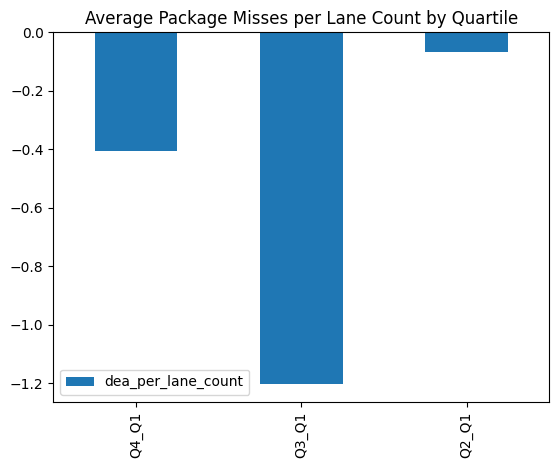

In [631]:
# Visualize the quartile differences
quartile_delta_df = pd.DataFrame.from_dict(quartile_delta, orient='index', columns=['dea_per_lane_count'])
quartile_delta_df.plot(kind='bar', title='Average Package Misses per Lane Count by Quartile')


<Axes: title={'center': 'Average Package Misses per Lane Count by Quartile'}, xlabel='quartile'>

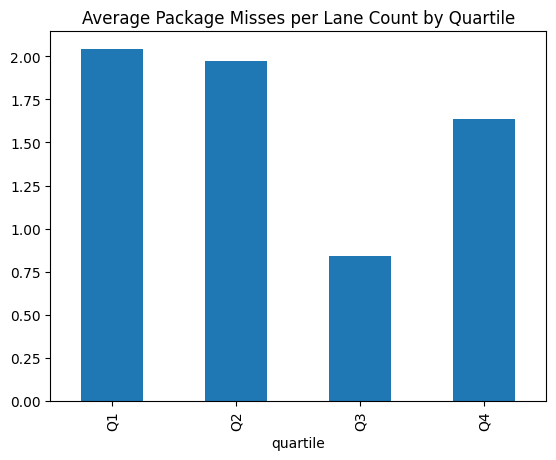

In [632]:
# Now lets just visualize the mean dea per lane count by quartile
lane_df3.groupby('quartile')['dea_per_lane_count'].mean().plot(kind='bar', title='Average Package Misses per Lane Count by Quartile')


# Based on this we can conclude there little correlation between the quartile and the average package misses per lane count.
# Lets move on to some linear regression models to see if we can predict the dea_pkgs based on the other columns.

In [633]:
# This was for the old land_df2, useful??

# Group by lane and quartile to calculate the sum of DEA misses
quartile_summary = lane_df2.groupby(['lane', 'quartile'])['dea'].mean().unstack()
quartile_summary.head()

quartile,Q1,Q2,Q3,Q4
lane,,,,
CYHM->INMS,37.60,29.212963,NaN,NaN
CYHM->YHM6,16.67,1.445378,1.083721,7.029466
CYHM->YUL5,0.06,0.033613,0.711628,0.634328
CYVR->DVC6,1.74,9.084034,1.679070,0.312500
CYVR->YVR7,0.25,0.302521,0.348837,0.514628


In [634]:
# Calculate differences in package misses between quartiles
Q4_Q1_diff = quartile_pivot.loc['Q4'] - quartile_pivot.loc['Q1']
Q3_Q1_diff = quartile_pivot.loc['Q3'] - quartile_pivot.loc['Q2']
Q2_Q1_diff = quartile_pivot.loc['Q2'] - quartile_pivot.loc['Q1']

# Combine the differences into a new dataframe
quartile_diffs = pd.DataFrame({'Q4-Q1': Q4_Q1_diff, 'Q3-Q2': Q3_Q1_diff, 'Q2-Q1': Q2_Q1_diff})
print(quartile_diffs)


                     Q4-Q1     Q3-Q2     Q2-Q1
global_dea_pkgs  22.125304  3.458304  1.614873


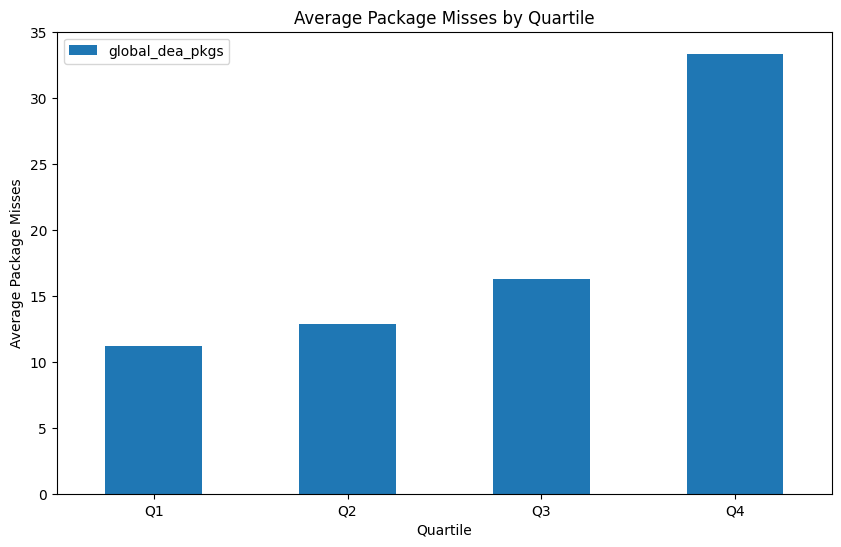

In [635]:
# Visualize the average package misses for each quartile
quartile_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Package Misses by Quartile')
plt.ylabel('Average Package Misses')
plt.xlabel('Quartile')
plt.xticks(rotation=0)
plt.show()

This graph shows that the longest lanes have the largest average package misses per load.  These quartiles are on scheduled hours as a whole whereas the previous chart was nested quartiles of scheduled hours within the unique lanes.  

# 4. Linear Regression Models


In [636]:
# Import the models for the regression analysis
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [637]:
# Make our data variable shorter: var_filtered_data -> vf_data
vf_data = var_filtered_data

In [638]:
# LR model requires all the features to be numeric so we'll have to do additional feature engineering.
# Start by looking at the remaining object columns to see if they can be converted to numeric.
for column in vf_data.select_dtypes(include='object').columns:
    print(column, vf_data[column].nunique())

lane 274
scac 531


In [639]:
# Since we have lane and scac encoded and mapped we can drop them.
vf_data.drop(['lane', 'scac'], axis=1, inplace=True)

In [640]:
# Check out the numeric columns
vf_data.select_dtypes(include='number').columns

Index(['rpt_wk', 'rpt_mon', 'scheduled_transit_hours',
       'vls_transit_hours_actual', 'transit_hours_actual', 'depart_hour_local',
       'arrived_early_minutes', 'xirgo_suspicious_data', 'miles',
       'mileage_band', 'mph', 'is_tot_min', 'is_tot_30_min',
       'under_bias_hours', 'over_bias_hours', 'is_using_tta_time',
       'total_pkg_unit_count', 'global_dea_pkgs', 'estimated_cost_accrual',
       'transit_operator_type', 'relay_elapsed_in_transit',
       'relay_elapsed_stationary', 'relay_transit_hours_actual',
       'relay_suspicious_data', 'vls_suspicious_data', 'tta_miles',
       'is_cpt_load', 'origin_coordinates', 'dest_coordinates', 'mi_band_max',
       'common_lane', 'is_toured', 'scac_target_encoded', 'ln_avg_hrs',
       'ln_avg_gdp', 'lane_num'],
      dtype='object')

In [641]:
# Drop common_lane since this column only has 1 value and will not help the model.
vf_data.drop(['common_lane'], axis=1, inplace=True)

In [642]:
# Make sure we have no nulls in the data
vf_data.isnull().sum()[vf_data.isnull().sum() != 0]

Series([], dtype: int64)

In [643]:
# Convert boolean columns to numeric (0 or 1)
bool_columns = vf_data.select_dtypes(include='bool').columns
vf_data[bool_columns] = vf_data[bool_columns].astype(int)

# Note this is not needed in RandomForest models but is needed in LR models.

In [644]:
# Determine the categorical columns that need to be converted to numeric and that won't be scaled.
target_column = 'global_dea_pkgs'
categorical_columns = ['lane_num', 'scac_target_encoded'] # These are currently suitable for a LR model.
ordinal_columns = ['mileage_band', 'mi_band_max','rpt_wk','rpt_mon','depart_hour_local']  # These columns are already ordinal so we don't need to convert them.
binary_columns = ['origin_coordinates', 'dest_coordinates', 'very_suspicious_data', 'transit_operator_type', 'is_tot_min', 'is_tot_30_min', 'is_toured', 'is_cpt_load', 'is_using_tta_time'] # These columns are already binary so we don't need to convert them.
ohe_columns = [col for col in vf_data.columns if 'arc_type' in col or 'origin_type' in col or 'destination_type' in col]
feature_columns = ordinal_columns + binary_columns + ohe_columns + categorical_columns
ignore_columns = ['vls_suspicious_data', 'relay_suspicious_data', 'xirgo_suspicious_data', 'vls_transit_hours_actual'] # Leave these out for now to reduce the number of features.
scale_columns = [col for col in vf_data.columns if col not in feature_columns + [target_column] + ignore_columns]

# Check the scale columns
print(scale_columns)


['scheduled_transit_hours', 'transit_hours_actual', 'arrived_early_minutes', 'miles', 'mph', 'under_bias_hours', 'over_bias_hours', 'total_pkg_unit_count', 'estimated_cost_accrual', 'relay_elapsed_in_transit', 'relay_elapsed_stationary', 'relay_transit_hours_actual', 'tta_miles', 'ln_avg_hrs', 'ln_avg_gdp']


In [645]:
# Normalize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
scaler = StandardScaler()

In [646]:
# Apply the scaler to the scale columns
vf_data[scale_columns] = scaler.fit_transform(vf_data[scale_columns])

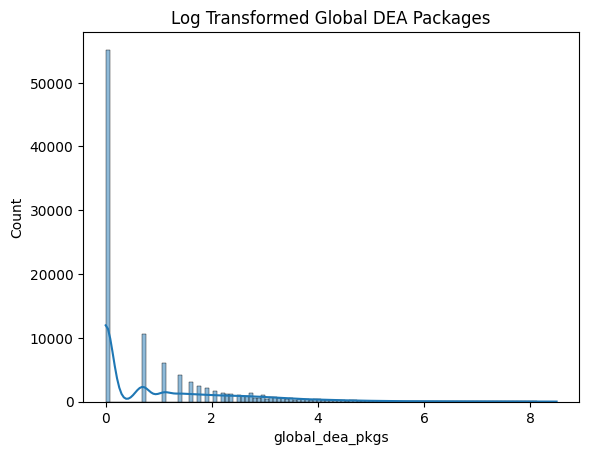

In [647]:
# Now lets log transform the target column to ensure a normal distribution.
vf_data[target_column] = np.log1p(vf_data[target_column])

# Visualize the target column
sns.histplot(vf_data[target_column], kde=True)
plt.title('Log Transformed Global DEA Packages')
plt.show()

Still skewed but much better than before the logtransform.

# To the models!

In [648]:
# Define out X and y variables, y is the target column and X is the feature columns.
X = vf_data[feature_columns]
y = vf_data[target_column]

In [649]:
# Split the data into training and testing sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [650]:
# Train and evaluate different regression models
models = {'Linear Regression': LinearRegression(), 'Ridge': Ridge(), 'Lasso': Lasso(), 'Elastic Net': ElasticNet()}

# Create a dictionary to store the results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

In [651]:
# Display the results
results_df = pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,0.850530,0.570297
Ridge,0.850447,0.570339
Lasso,1.789727,0.095798
Elastic Net,1.772564,0.104469


These aren't great results, R2 score is only predicting about 57% of the variance for R2 on the high end. 


In [652]:
# Perform cross-validation with different feature sets
feature_sets = {'All Features': X, 'No Binary Features': X.drop(binary_columns, axis=1), 'No Categorical Features': X.drop(ohe_columns, axis=1), 'No Ordinal Features': X.drop(ordinal_columns, axis=1), 'No Lane Features': X.drop(['lane_num'], axis=1), 'No Scac Features': X.drop(['scac_target_encoded'], axis=1)}
cv_results = {}


In [569]:
scores = []
for name, features in feature_sets.items():
    for model in models.values():
        scores = cross_val_score(model, features, y, cv=5, scoring='r2', n_jobs=-1)
        cv_results[name] = scores

# Display the cross validation results
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df

,0,1,2,3,4
All Features,0.093848,0.109294,0.107061,0.050504,0.106256
No Binary Features,0.093848,0.109294,0.107061,0.050504,0.106256
No Categorical Features,0.093848,0.109294,0.107061,0.050504,0.106256
No Ordinal Features,0.083079,0.096926,0.094937,0.037919,0.094993
No Lane Features,0.092586,0.107902,0.105525,0.049324,0.105242
No Scac Features,0.017095,0.020213,0.020161,0.017360,0.018348


# 4. Insights and key findings


Interpretation of the cv_result (cross-validation) scores:
0 is the baseline R2 score and 1-4 are the models (LR, Ridge, Lasso, Elastic Net)
All Features row is the baseline score. If removed the results are changes for better or worst.  
The insightful interpretation highlight of this chart would be that scac feature has the strongest impact on determining package misses, scac being the contracted linehaul service provider. Removing scac significantly drops the performance of the model. 
Removing binary and categorical (OneHot columns) features have no impact at all. 
For the Ordinal and Lane features rows, the scores drops indicating the model performs slightly worse without the ordinal features. 

Interpretation of the results_df (MSE, R2) scores:
The MSE and R2 for the different models and feature sets showed that the Linear Regression and Ridge models performed the best with an MSE's around .85 and R2 scores around 0.85. These models would be better options for determining packages misses based on the available features.
Lasso and Elastic Net performed poorly compared to Linear Regression and Ridge, indicating that regularization penalty on squared coefficients significantly reduces model performance.  
With some fine tuning and additional feature engineering, we could potentially improve the model's performance further. 
As seen with the EDA based analysis using scheduled transit quartiles there was very mixed results in correlative performance. 
This model could be improved by breaking up the primary dataset by a different subset. The large size of the dataset may have caused the model to be less accurate.


# 5. Next Steps


Next steps would be to further refine the feature engineering and model selection process to improve the model performance. 
This could include additional feature selection techniques, hyperparameter tuning, and exploring other regression models.
I could also other correlation analysis to identify the most important features and use those in the model.

Other potential improvements could include using more advanced techniques such as random forest or gradient boosting models to improve the model performance which are covered in the next segment of this course. 

---
**Author:** William Ruffu  
**Date:** March 2024  
**License:** All Rights Reserved | Open Source License | Freely distributable  
© 2024 William Ruffu
